                                            Assignment: Random Forest

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



df = pd.read_csv(r"C:\Ankit_Singh\Data Science\Sample Data\glass.csv")
print(df)


       RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.52  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.52  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.52  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.52  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..    ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.52  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.52  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.52  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.52  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


In [3]:
# Renaming columns for better readability
df.rename(columns={
    'RI': 'Refractive Index',
    'Na': 'Sodium',
    'Mg': 'Magnesium',
    'Al': 'Aluminum',
    'Si': 'Silicon',
    'K': 'Potassium',
    'Ca': 'Calcium',
    'Ba': 'Barium',
    'Fe': 'Iron'
}, inplace=True)

print(df)

     Refractive Index  Sodium  Magnesium  Aluminum  Silicon  Potassium  \
0                1.52   13.64       4.49      1.10    71.78       0.06   
1                1.52   13.89       3.60      1.36    72.73       0.48   
2                1.52   13.53       3.55      1.54    72.99       0.39   
3                1.52   13.21       3.69      1.29    72.61       0.57   
4                1.52   13.27       3.62      1.24    73.08       0.55   
..                ...     ...        ...       ...      ...        ...   
209              1.52   14.14       0.00      2.88    72.61       0.08   
210              1.52   14.92       0.00      1.99    73.06       0.00   
211              1.52   14.36       0.00      2.02    73.42       0.00   
212              1.52   14.38       0.00      1.94    73.61       0.00   
213              1.52   14.23       0.00      2.08    73.36       0.00   

     Calcium  Barium  Iron  Type  
0       8.75    0.00   0.0     1  
1       7.83    0.00   0.0     1  
2     

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Refractive Index  214 non-null    float64
 1   Sodium            214 non-null    float64
 2   Magnesium         214 non-null    float64
 3   Aluminum          214 non-null    float64
 4   Silicon           214 non-null    float64
 5   Potassium         214 non-null    float64
 6   Calcium           214 non-null    float64
 7   Barium            214 non-null    float64
 8   Iron              214 non-null    float64
 9   Type              214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
# lets create a function which assign type name to the df['Type'] column
def assign_type(value):
    if value ==1:
        return '1-Building_Windows_Float_Processed'
    elif value ==2:
        return '2-Building_Windows_Non_Float_Processed'
    elif value ==3:
        return '3-Vehicle_Windows_Float_Processed'
    elif value ==4:
        return '4-Vehicle_Windows_Non_Float_Processed'
    elif value ==5:
        return '5-Containers'
    elif value ==6:
        return '6-Tableware'
    elif value==7:
        return '7-Headlamps'
    else:
        return 'Other'

In [6]:
df['Type']=df['Type'].apply(assign_type)
print(df.head())

   Refractive Index  Sodium  Magnesium  Aluminum  Silicon  Potassium  Calcium  \
0              1.52   13.64       4.49      1.10    71.78       0.06     8.75   
1              1.52   13.89       3.60      1.36    72.73       0.48     7.83   
2              1.52   13.53       3.55      1.54    72.99       0.39     7.78   
3              1.52   13.21       3.69      1.29    72.61       0.57     8.22   
4              1.52   13.27       3.62      1.24    73.08       0.55     8.07   

   Barium  Iron                                Type  
0     0.0   0.0  1-Building_Windows_Float_Processed  
1     0.0   0.0  1-Building_Windows_Float_Processed  
2     0.0   0.0  1-Building_Windows_Float_Processed  
3     0.0   0.0  1-Building_Windows_Float_Processed  
4     0.0   0.0  1-Building_Windows_Float_Processed  


In [7]:
for item in df['Type'].unique():
    print(item)



1-Building_Windows_Float_Processed
2-Building_Windows_Non_Float_Processed
3-Vehicle_Windows_Float_Processed
5-Containers
6-Tableware
7-Headlamps


In [8]:
# Now checking if the dataset contains any missing values or nulls
print("(1) Missing values in each column:")
print("------------------------------------")
print(df.isnull().sum())
print("\n")

print("(2) Any missing values in the entire dataset:")
print("---------------------------------------------")
print(df.isnull().any())
print("\n")

print("(3) Are there any missing values in the entire dataset?")
print("---------------------------------------------")
if df.isnull().values.any():
    print("Yes, there are missing values in the dataset.")
else:
    print("No, there are no missing values in the dataset.")


(1) Missing values in each column:
------------------------------------
Refractive Index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type                0
dtype: int64


(2) Any missing values in the entire dataset:
---------------------------------------------
Refractive Index    False
Sodium              False
Magnesium           False
Aluminum            False
Silicon             False
Potassium           False
Calcium             False
Barium              False
Iron                False
Type                False
dtype: bool


(3) Are there any missing values in the entire dataset?
---------------------------------------------
No, there are no missing values in the dataset.


<Figure size 1500x1000 with 0 Axes>

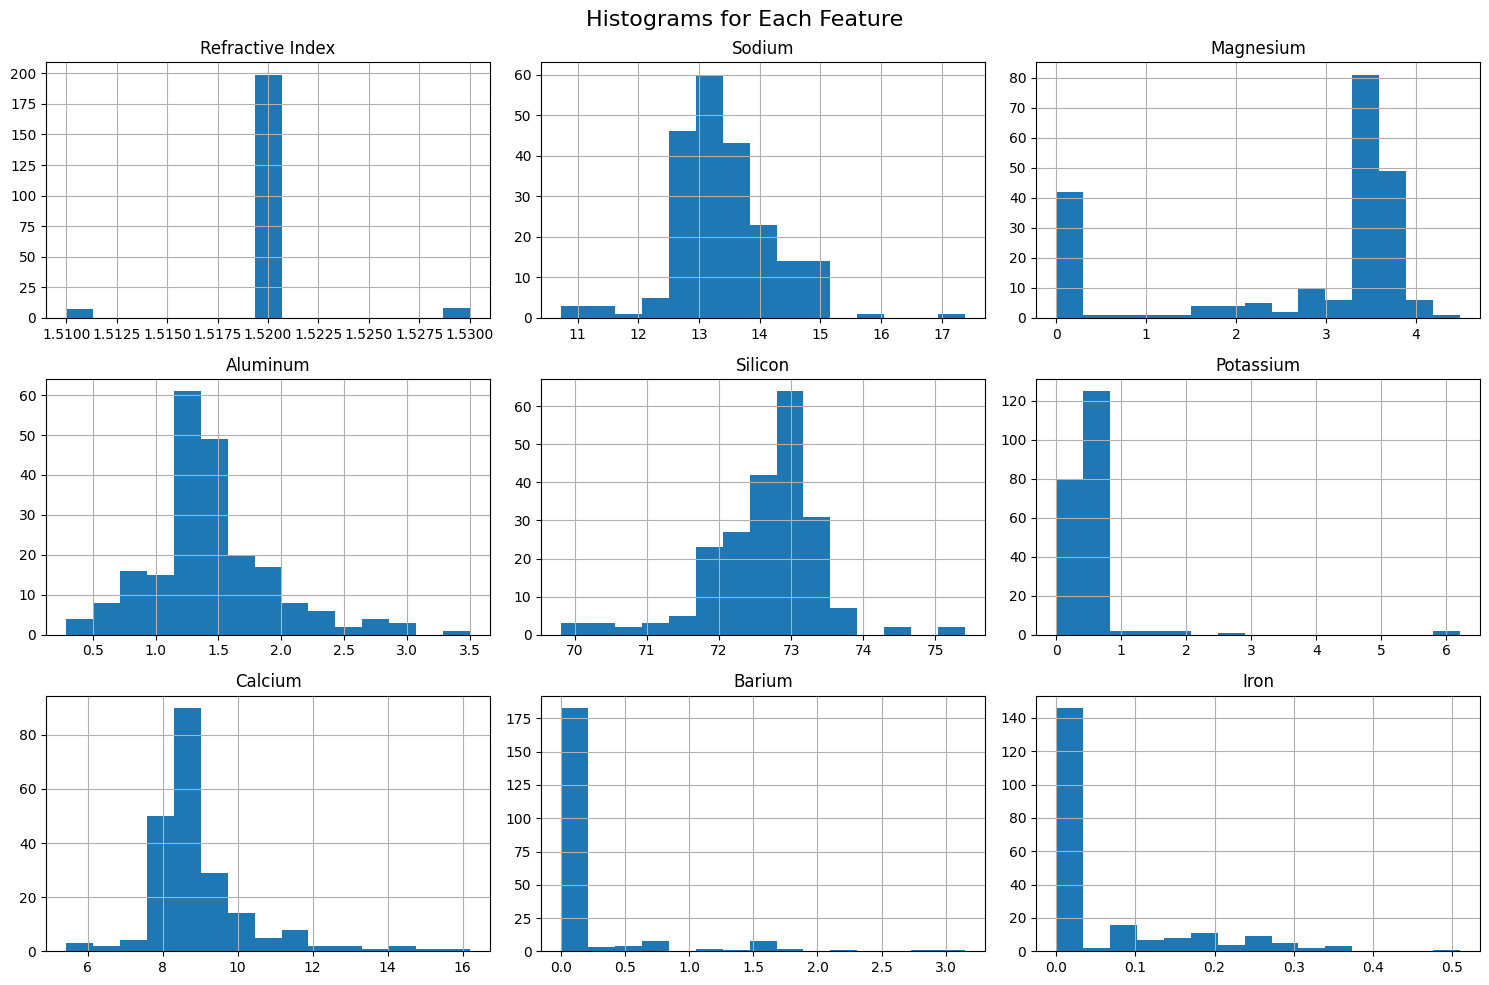

In [9]:
# ploting histogram for better understanding of the data set
plt.figure(figsize=(15, 10))
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms for Each Feature', fontsize=16)
plt.tight_layout()
plt.show()

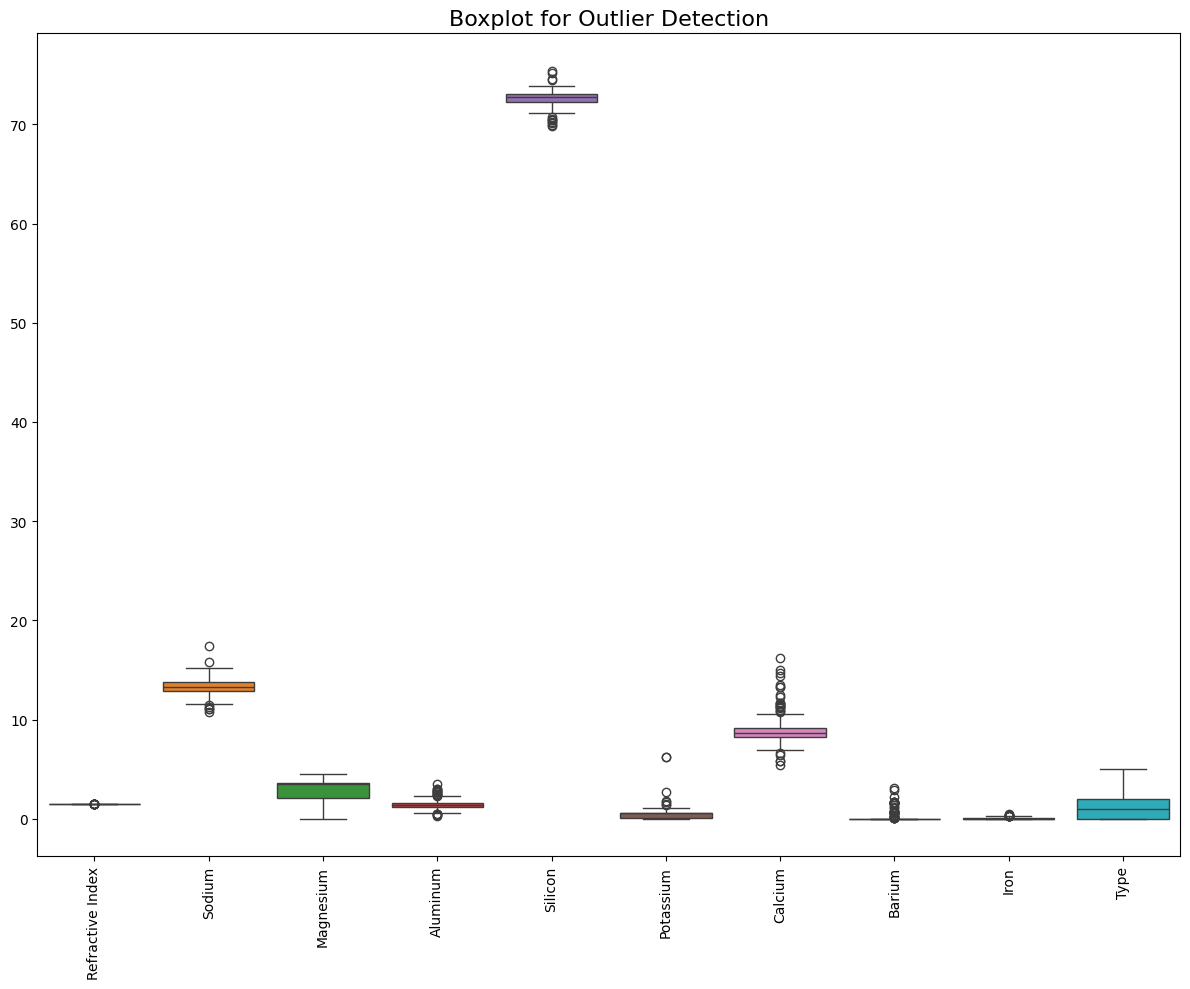

In [14]:
# 2. Boxplot to check for outliers 
plt.figure(figsize=(12, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot for Outlier Detection', fontsize=16)
plt.tight_layout()
plt.show()


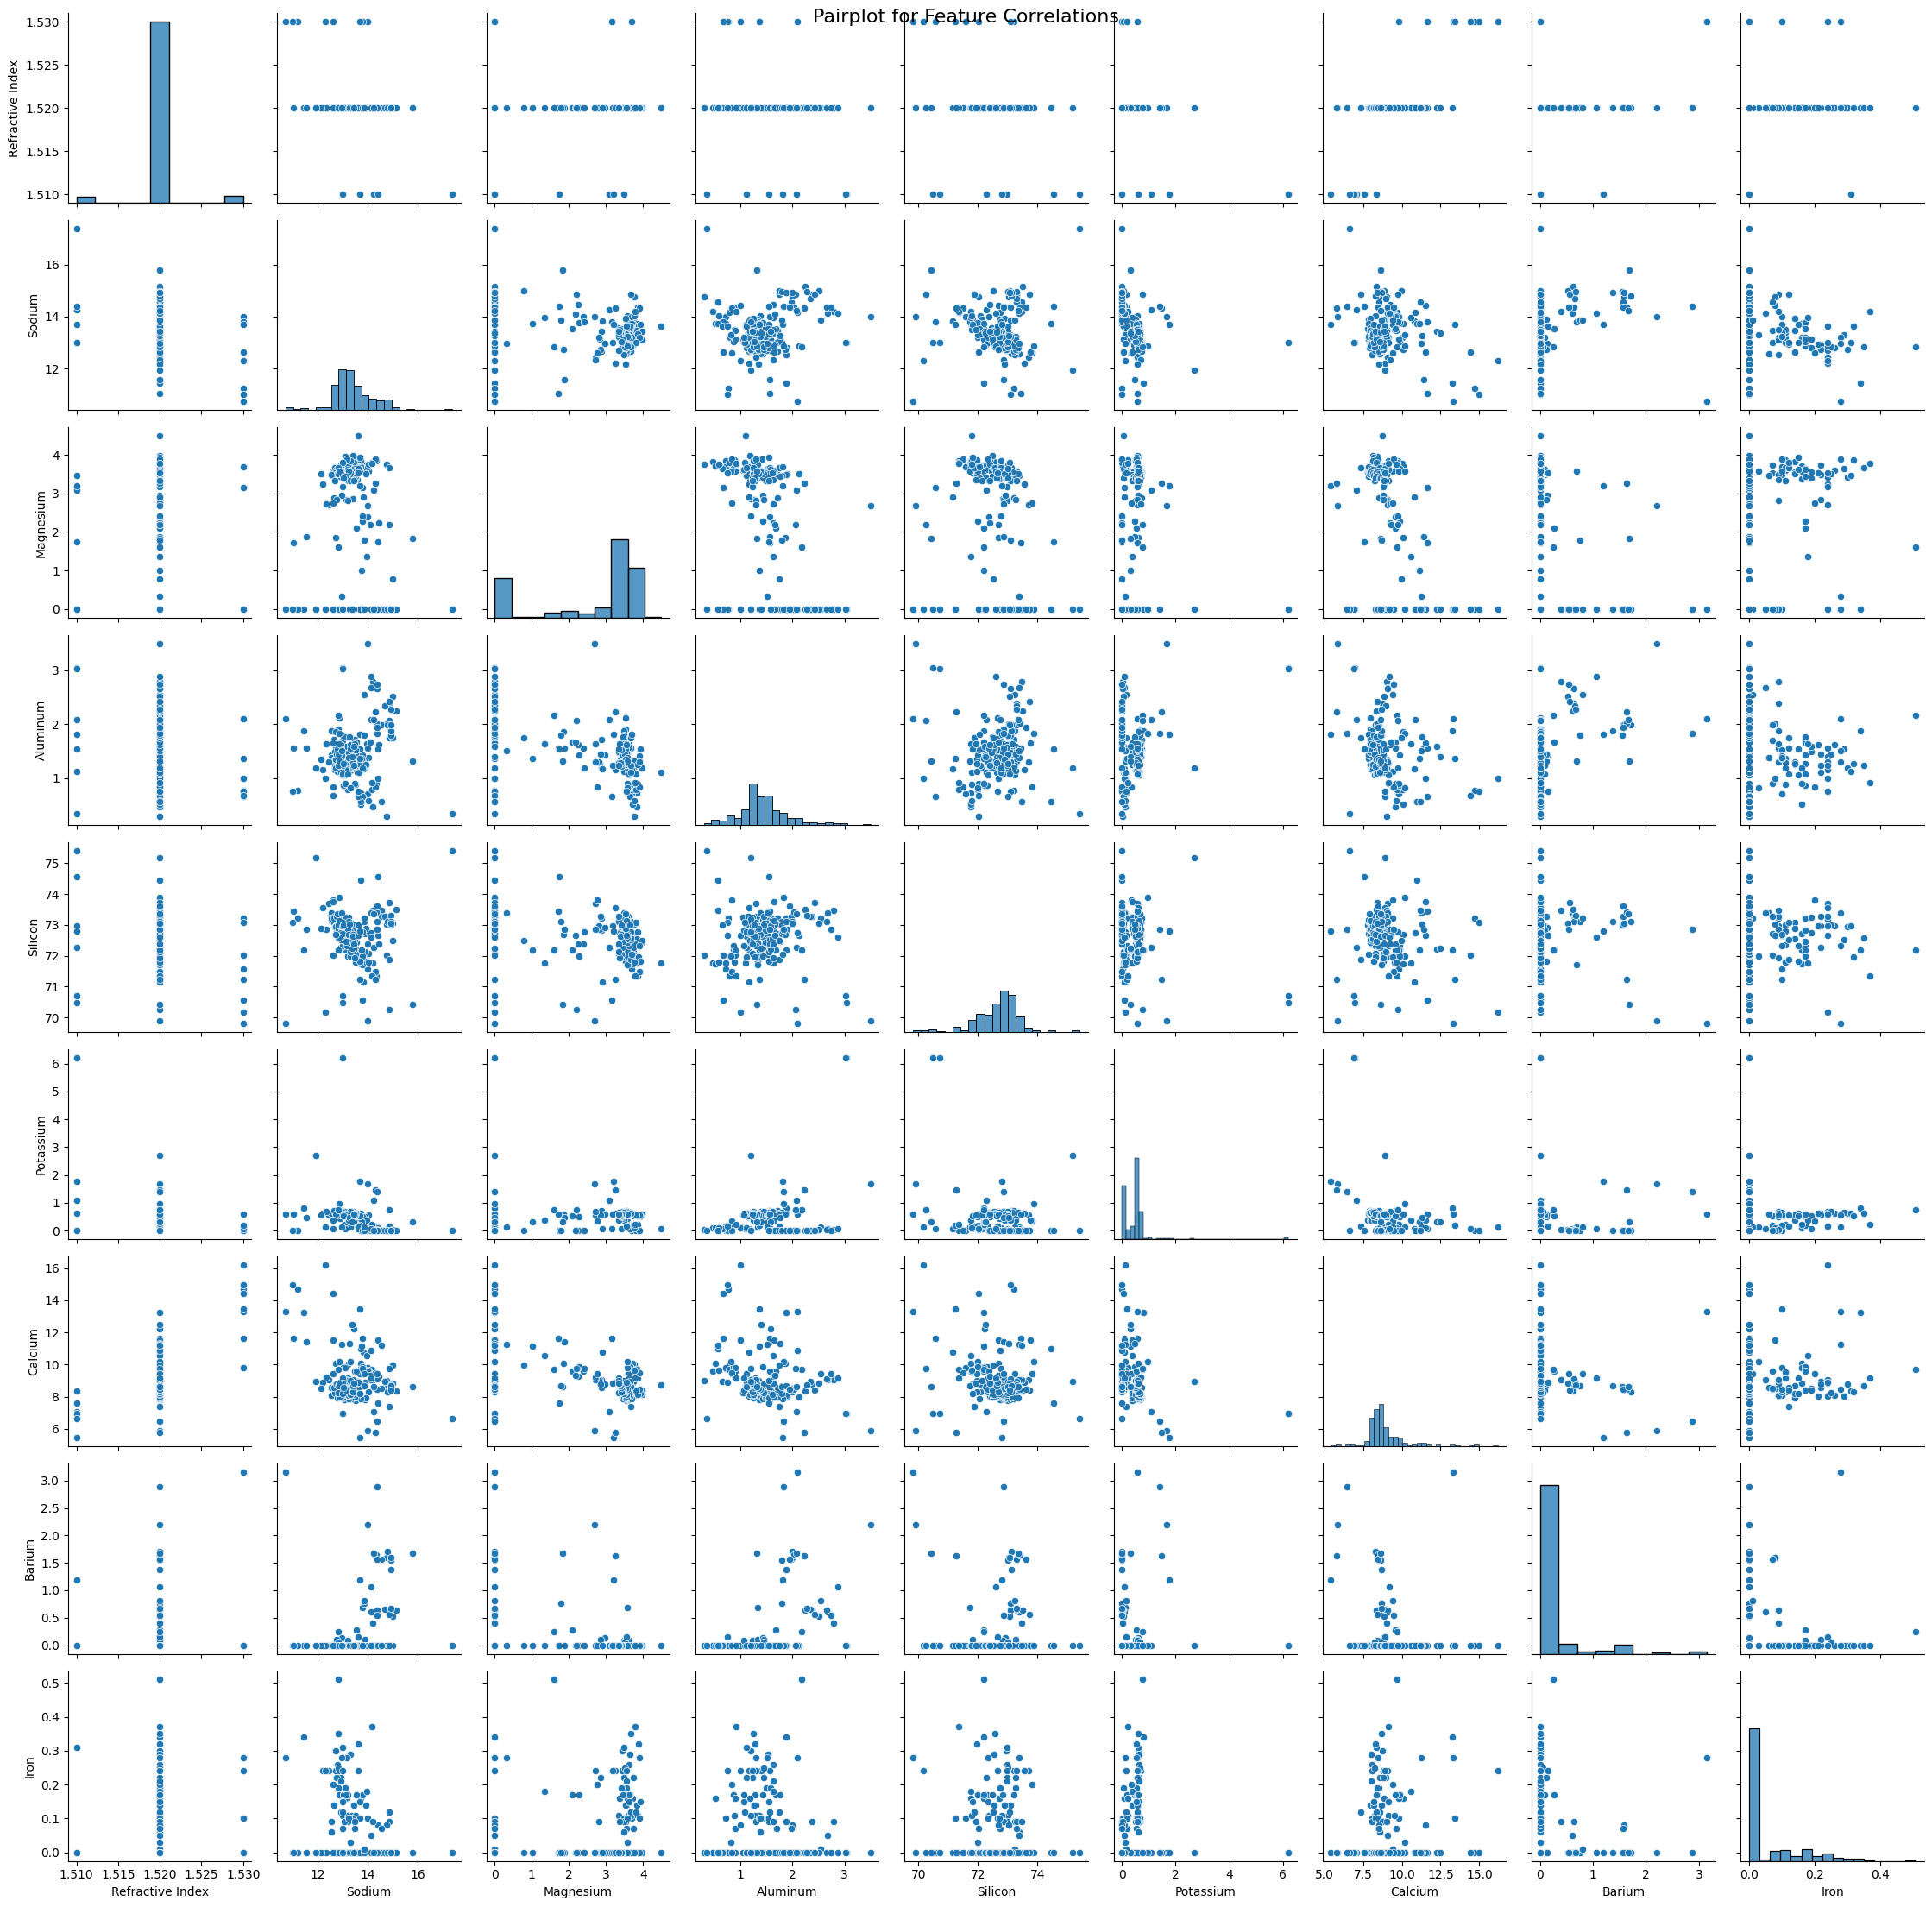

In [11]:
# 3. Pairplot to visualize correlations between features 
sns.pairplot(df)
plt.suptitle('Pairplot for Feature Correlations', fontsize=16)
plt.tight_layout()
plt.show()


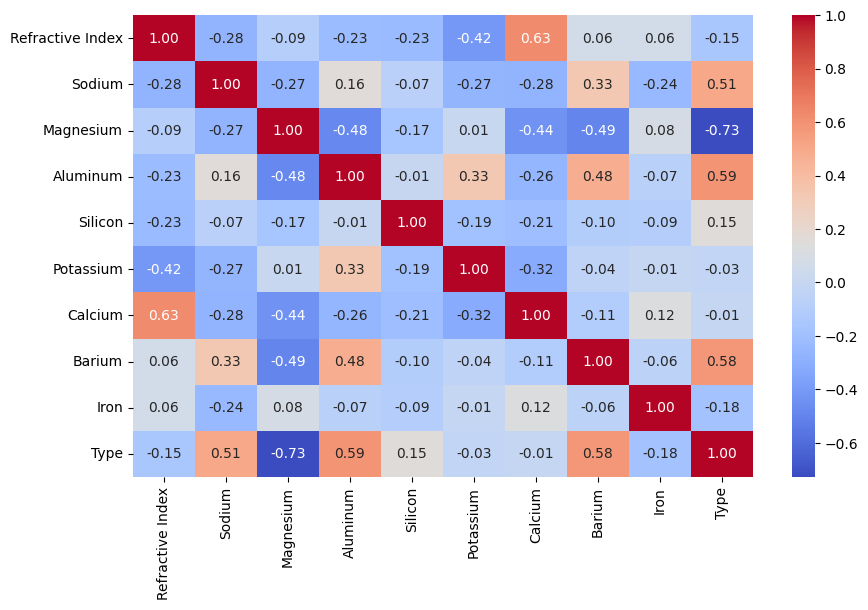

In [15]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [16]:
# Encoding the target variable 'Type' using LabelEncoder
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])


In [17]:
from sklearn.preprocessing import StandardScaler

# Separating features (X) and target (y)
X = df.drop(columns=[col for col in df.columns if 'Type' in col])
y = df[[col for col in df.columns if 'Type' in col]]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [18]:
from sklearn.model_selection import train_test_split

# Splitting the data into train test spilt
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [19]:
from sklearn.ensemble import RandomForestClassifier

#intitialising the random forest model
RF_model=RandomForestClassifier(n_estimators=100,random_state=42)
RF_model.fit(X_train,y_train)

c:\Users\akash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_pred = RF_model.predict(X_test)

# Evaluating the model using different metrics
Accuracy = accuracy_score(y_test, Y_pred)
Precision = precision_score(y_test, Y_pred, average='weighted')
Recall = recall_score(y_test, Y_pred, average='weighted')
F1 = f1_score(y_test, Y_pred, average='weighted')

print(f"Accuracy: {Accuracy:.2F}")
print(f"Precision: {Precision:.2F}")
print(f"Recall: {Recall:.2F}")
print(f"F1 Score: {F1:.2F}")


Accuracy: 0.77
Precision: 0.79
Recall: 0.77
F1 Score: 0.76


In [22]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(n_estimators=100, random_state=42)

bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Accuracy: {accuracy_bagging:.2f}")


Bagging Accuracy: 0.72


c:\Users\akash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:877: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
from sklearn.ensemble import AdaBoostClassifier

boosting_model = AdaBoostClassifier(n_estimators=100, random_state=42)

boosting_model.fit(X_train, y_train)

y_pred_boosting = boosting_model.predict(X_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print(f"Boosting Accuracy: {accuracy_boosting:.2f}")


Boosting Accuracy: 0.48


c:\Users\akash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
print(f"Random Forest Accuracy: {Accuracy:.2f}")
print(f"Bagging Accuracy: {accuracy_bagging:.2f}")
print(f"Boosting Accuracy: {accuracy_boosting:.2f}")



Random Forest Accuracy: 0.77
Bagging Accuracy: 0.72
Boosting Accuracy: 0.48


Observations:

Data Cleaning & Preparation:

Column names were renamed for clarity.

The categorical target variable (Type) was mapped to descriptive labels, improving interpretability.

The Type column was then encoded using LabelEncoder for model training.

Exploratory Data Analysis (EDA):

Histograms revealed varying distributions for different features, some skewed and some more normally distributed.

Boxplots indicated the presence of outliers in features like Sodium, Calcium, and Potassium.

Pairplot visualized relationships and clustering tendencies among the classes.

Correlation Heatmap showed moderate correlations among some features (e.g., Sodium and Magnesium had inverse trends).

Data Preprocessing:

Features were standardized using StandardScaler to normalize the range of values.

Data was split into training and testing sets using a 70:30 ratio.

Model Building and Evaluation:

Random Forest:

Achieved the best performance with 77% accuracy.

Other metrics (Precision: 0.79, Recall: 0.77, F1 Score: 0.76) indicate balanced and effective classification.

Bagging Classifier:

Performed reasonably well with 72% accuracy but slightly lower than Random Forest.

AdaBoost Classifier:

Performed poorly with 48% accuracy, indicating it may not be well-suited for this dataset without further tuning.

Conclusion:
Random Forest was the most effective model for classifying glass types, likely due to its ability to handle non-linear relationships and noisy data.

Bagging offered moderately good results but did not outperform Random Forest, despite using ensemble principles.

Boosting (AdaBoost) performed poorly, possibly due to sensitivity to noisy data or the small size of the dataset, which can lead to overfitting or underfitting.

Recommendation: For this dataset, Random Forest is the preferred model. However, further tuning of hyperparameters or trying other boosting techniques like Gradient Boosting or XGBoost may improve results.